# Car price prediction

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Arkaj\Downloads\Car price\CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape#Checking Dimensions of the Data

(205, 26)

In [4]:
df.describe()#Descriptive Statistics

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()#Checking the basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.dtypes#provides info on datatype of each column

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df.nunique()#shows the no. of unique value for each column

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# Data Cleaning

In [8]:
df.isnull().sum()#provides count of no. null values per column

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.duplicated().sum()#Chceking duplicate values 

0

Since there are no null or duplicate values present in any column,we move on to feature enginnering

# Feature Engineering

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


As we can see that the 'CarName' Feature is storing both the car's company name and the model name of the car,so we split the 'CarName' feature into new features "company_name" and 'model_name" which may be beneficial to our analysis.

In [11]:
str_split= df['CarName'].str.split(' ', 1)
df['company_name'] = str_split.str[0]
df['model_name'] = str_split.str[1]
df.drop(columns=["CarName"],inplace=True)


In [12]:
df.head(55).transpose()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
car_ID,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
symboling,3,3,1,2,2,2,1,1,1,0,...,0,2,0,0,0,1,1,1,1,1
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,std,std,std,std,std,std,std
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,two,four,four,two,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,sedan,hatchback,sedan,sedan,sedan,hatchback,hatchback,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,fwd,rwd,rwd,rwd,rwd,fwd,fwd,fwd,fwd,fwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,94.5,96.0,113.0,113.0,102.0,93.1,93.1,93.1,93.1,93.1
carlength,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,155.9,172.6,199.6,199.6,191.7,159.1,159.1,159.1,166.8,166.8


We notice some spelling error in the company_name "mazda",so we will be checking for unique values in the said column.

In [13]:
df["company_name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
#Function to rectify speling errors in the column "company_name"
def replace(old,new):
    df["company_name"].replace(old,new,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('Nissan','nissan')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')


In [15]:
df["company_name"].unique()#Checking if the function works

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'company_name', 'model_name'],
      dtype='object')

In [17]:
df["cylindernumber"].unique()#checking unique values in the column"cylindernumber"

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
#Function to convert numbers from word format to their numeric equivalent values
def replace(old,new):
    df["cylindernumber"].replace(old,new,inplace=True)

replace('two','2')
replace('three','3')
replace('four','4')
replace('five','5')
replace('six','6')
replace('eight','8')
replace('twelve','12')

df['cylindernumber'] = df['cylindernumber'].astype('int64')

df.head(10)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,model_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,100ls
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,fox
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,100ls
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,5000
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,4000
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,5000s (diesel)


In [19]:
#df.dtypes

In [20]:
#creating new feature named "engine_displacement"
df['engine_displacement'] = df['enginesize'] * df['cylindernumber']
df.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,model_name,engine_displacement
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,520
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,520
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,912


In [21]:
#creating new feature named "mileage_combined"
df['mileage_combined'] = (df['citympg'] + df['highwaympg']) / 2
df.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,model_name,engine_displacement,mileage_combined
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,520,24.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,520,24.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,912,22.5


In [22]:
 #creating a new feature 'price_category' 
def category(price):
    if price <= 15000:
        return 'Budget'
    elif 15000<price <= 25000:
        return 'Mid-Range'
    else:
        return 'Luxury'

# Apply the categorize_price function to create the 'price_category' column
df['price_category'] = df['price'].apply(category)

In [23]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,company_name,model_name,engine_displacement,mileage_combined,price_category
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,giulia,520,24.0,Budget
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,stelvio,520,24.0,Mid-Range
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,912,22.5,Mid-Range
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,audi,100 ls,436,27.0,Budget
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,audi,100ls,680,20.0,Mid-Range


In [24]:
desired_columns = ['car_ID', 'symboling', 'company_name', 'model_name', 'fueltype', 'aspiration', 'doornumber',
                   'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
                   'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                   'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'engine_displacement', 
                   'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'mileage_combined', 'price','price_category'
                   ]

# Rearranging the columns based on the desired order
df = df[desired_columns]
df.head().transpose()

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
company_name,alfa-romero,alfa-romero,alfa-romero,audi,audi
model_name,giulia,stelvio,Quadrifoglio,100 ls,100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front


In [25]:
df.columns

Index(['car_ID', 'symboling', 'company_name', 'model_name', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'engine_displacement', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mileage_combined', 'price',
       'price_category'],
      dtype='object')

Interpretations:-

We define new features by creating new features by modifying existing features -

company_name-Provides the company name of the car	

model_name- Provides model name of the car	

engine_displacement-Engine displacement refers to the total volume of all the cylinders in an internal combustion engine. It is typically measured in cubic centimeters (cc) and represents the total amount of air and fuel that can be drawn into the engine's cylinders during one complete engine cycle.Engine displacement is an essential parameter for describing an engine's size and capacity. It is a key factor in determining an engine's power output, fuel efficiency, and performance characteristics.	

mileage_combined- provides milage information of cars by combining "citympg" and "highwaympg" in a meaningful way by taking their average.	

price_category- Categorizes cars into "Budget," "Mid-Range" or "Luxury" price categories based on their price values.


# Univariate Analysis

In [26]:
# Numerical Features
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                    'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                    'engine_displacement', 'horsepower', 'peakrpm', 'citympg', 
                    'highwaympg', 'mileage_combined']

# Categorical Features
categorical_features = ['symboling','company_name', 'cylindernumber' , 'fueltype', 'aspiration', 
                        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
                        'enginetype', 'fuelsystem', 'price_category']



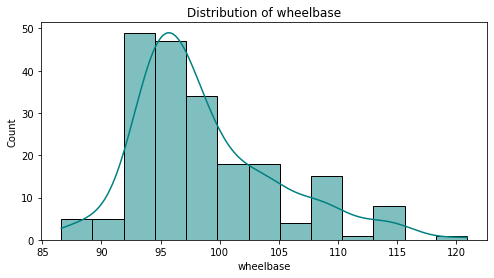

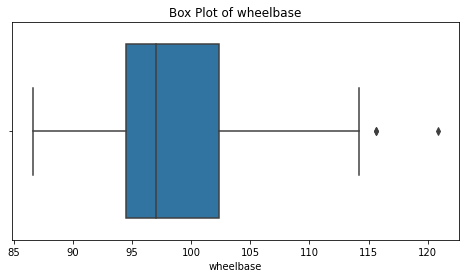

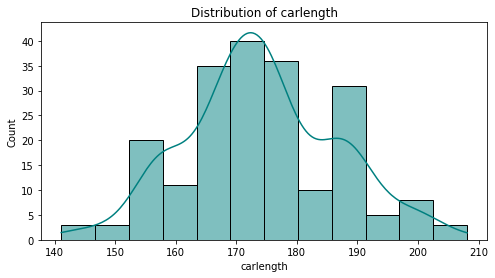

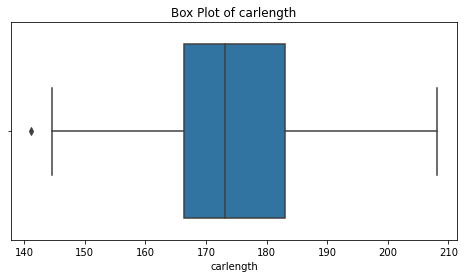

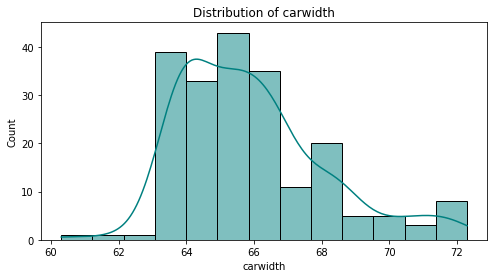

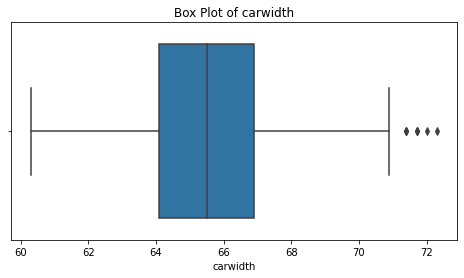

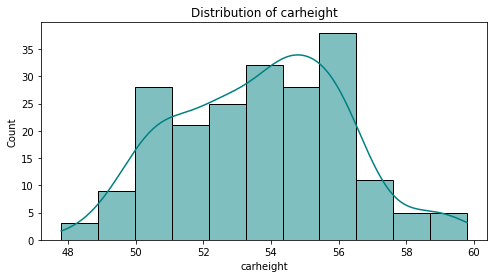

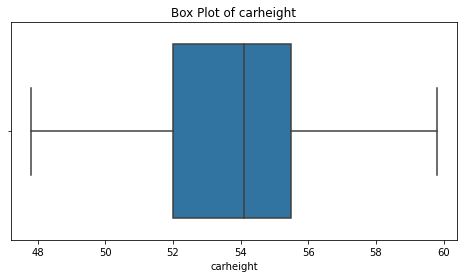

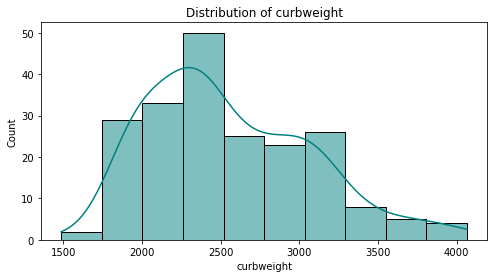

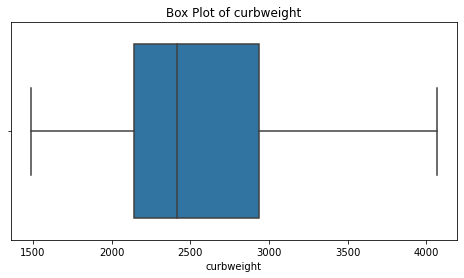

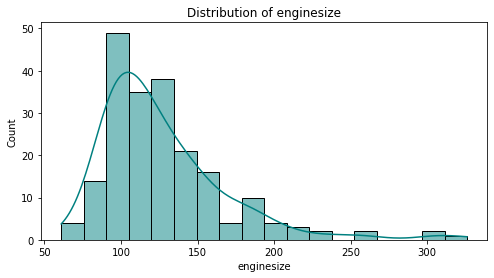

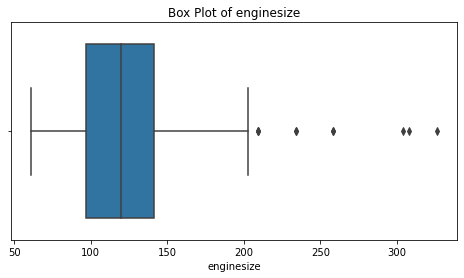

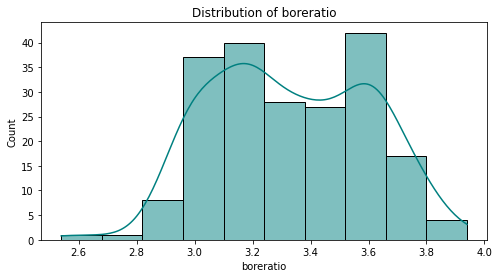

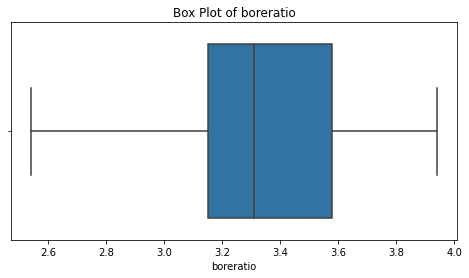

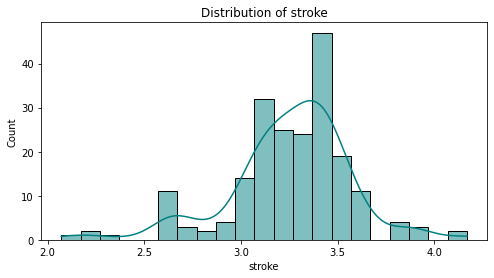

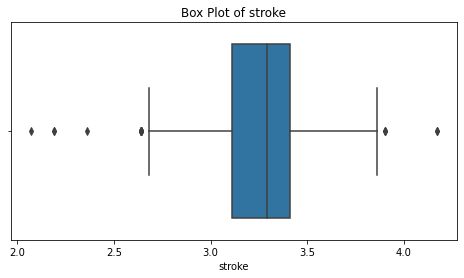

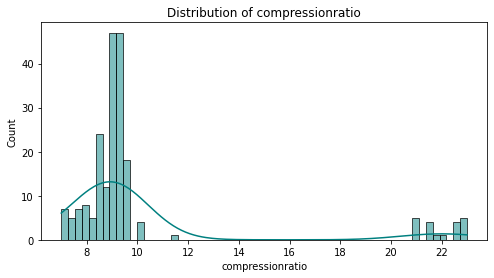

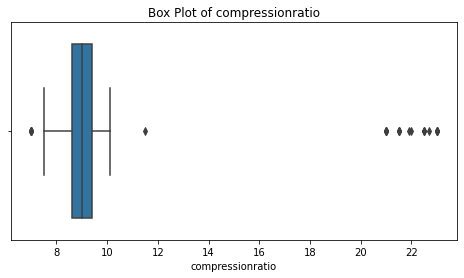

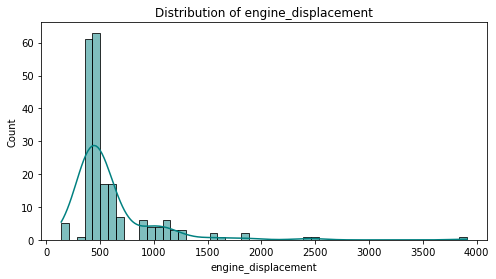

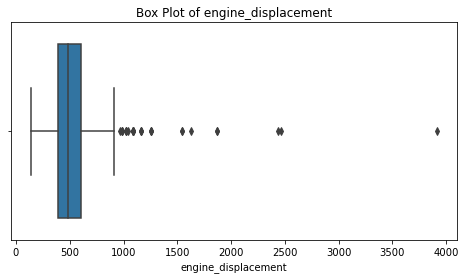

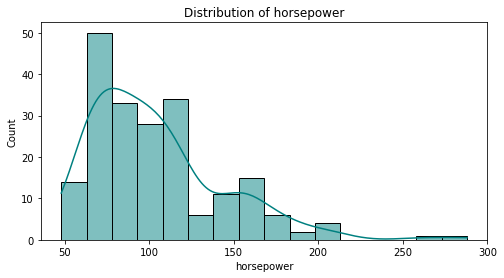

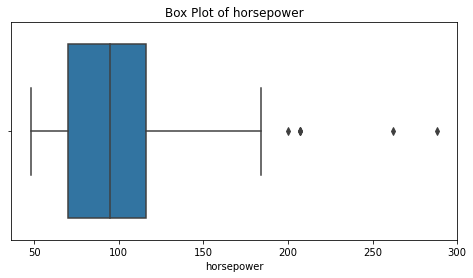

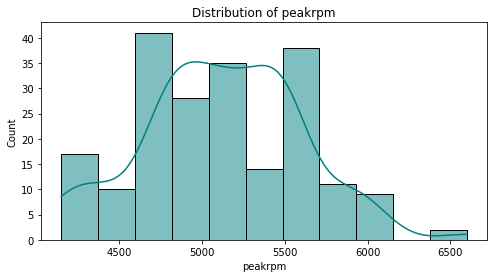

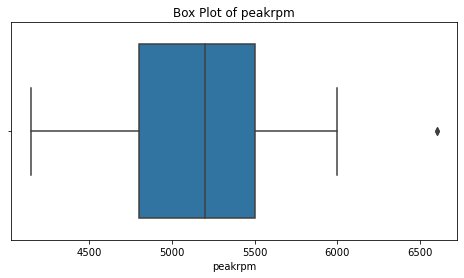

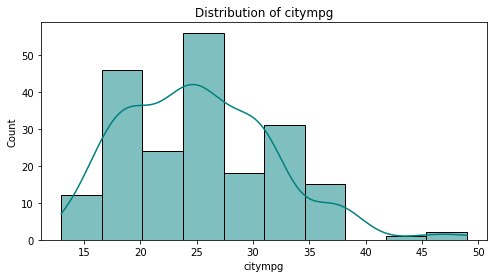

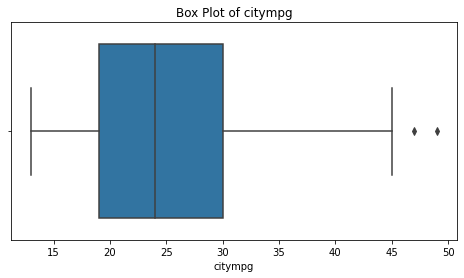

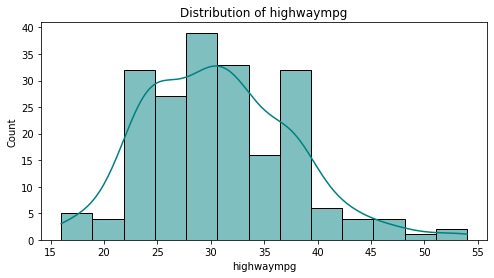

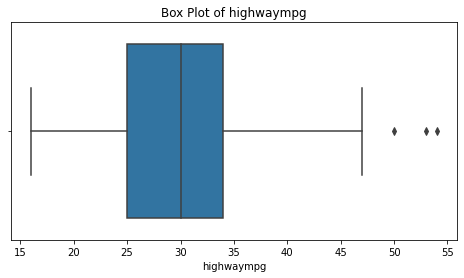

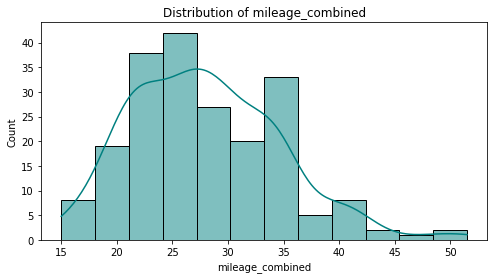

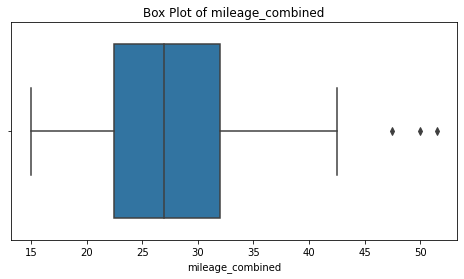

In [27]:
# Looping through numeric features for univariate analysis
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df,color= 'Teal', x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Adding a box plot to the analysis
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()
    
# Summary statistics for numeric features
summary_stats = df[numeric_features].describe()
#Kindly scroll to view the graphs

Interpretations:-

wheelbase:

Boxplot: The boxplot shows that the distribution of wheelbase values has some variability, with a few potential outliers on the upper side. The median wheelbase value falls within the interquartile range (IQR), indicating that most cars have a similar wheelbase. Some cars have longer wheelbases, potentially corresponding to larger or more spacious vehicles.

Histogram: The histogram shows the distribution of wheelbase values, with a peak around the median. It confirms that most cars have similar wheelbases but also highlights the presence of a few outliers with longer wheelbases.

carlength:

Boxplot: The boxplot for carlength indicates that there is some variability in car length, with a few potential outliers on the upper side. The median car length falls within the IQR, suggesting that most cars have similar lengths. Longer cars are present but less common.

Histogram: The histogram for carlength shows a distribution with a peak around the median value, indicating that many cars have similar lengths. Some cars are longer, contributing to the right tail of the distribution.

carwidth:

Boxplot: The boxplot for carwidth shows less variability than car length or wheelbase. The majority of cars have similar widths, as indicated by the narrow IQR. There are no obvious outliers in this feature.

Histogram: The histogram confirms that carwidth values cluster around the median, with minimal variation. It suggests that most cars have similar widths.

carheight:

Boxplot: The boxplot for carheight displays a relatively narrow IQR, indicating that most cars have similar heights. There is no evidence of significant outliers in this feature.

Histogram: The histogram confirms that carheight values are concentrated around the median, with little variation. It suggests that car height is relatively consistent across the dataset.

curbweight:

Boxplot: The boxplot for curbweight shows some variability, with a few potential outliers on the upper side. The median curb weight falls within the IQR, indicating that most cars have similar curb weights. Heavier cars are present but less common.

Histogram: The histogram shows a distribution with a peak around the median value, indicating that many cars have similar curb weights. Some cars are heavier, contributing to the right tail of the distribution.

enginesize:

Boxplot: The boxplot for enginesize suggests that there is a wide range of engine sizes in the dataset. While the majority of cars have engine sizes within the IQR, there are several potential outliers on the upper side. This indicates that some cars have larger engines, likely associated with higher performance or power.

Histogram: The histogram illustrates the distribution of enginesize values, with a peak around the median. It confirms the presence of various engine sizes, including larger engines that contribute to the right tail of the distribution.

boreratio:

Boxplot: The boxplot for boreratio shows moderate variability in boreratio values, with no significant outliers. Most cars have similar boreratios, as suggested by the narrow IQR.

Histogram: The histogram reveals a distribution with a peak around the median boreratio, indicating that many cars share a similar boreratio. There is limited variation in this feature.

stroke:

Boxplot: The boxplot for stroke displays some variability in stroke values, but no distinct outliers. The median stroke falls within the IQR, suggesting that most cars have similar stroke lengths.

Histogram: The histogram depicts a distribution with a peak around the median stroke length. It indicates that the dataset consists mainly of cars with similar stroke values.

compressionratio:

Boxplot: The boxplot for compressionratio shows considerable variability, with a few potential outliers on both ends. It suggests a wide range of compression ratios among the cars.

Histogram: The histogram reflects the distribution of compressionratio values, with no clear peak. It demonstrates that compression ratios vary significantly across the dataset.

engine_displacement:

Boxplot: The boxplot for engine_displacement indicates a range of engine displacements, with a few potential outliers on the upper side. The median displacement falls within the IQR, suggesting that most cars have similar engine displacements.

Histogram: The histogram illustrates the distribution of engine_displacement values, with a peak around the median. It confirms that many cars share a similar engine displacement, with some outliers having larger displacements.

horsepower:

Boxplot: The boxplot for horsepower displays variability in horsepower values, with some potential outliers on the upper side. The median horsepower falls within the IQR, indicating that most cars have similar horsepower ratings.

Histogram: The histogram shows a distribution with a peak around the median horsepower. It suggests that many cars have similar horsepower ratings, while some cars have higher horsepower.

peakrpm:

Boxplot: The boxplot for peakrpm exhibits variability in peak RPM (revolutions per minute) values, with no significant outliers. Most cars have peak RPM values within a similar range, as shown by the narrow IQR.

Histogram: The histogram illustrates the distribution of peakrpm values, with a peak around the median. It indicates that the dataset contains cars with peak RPM values concentrated around a central range.

citympg:

Boxplot: The boxplot for citympg suggests variability in city miles per gallon (MPG) values, with a few potential outliers on the upper side. The median city MPG falls within the IQR, indicating that most cars have similar city fuel efficiency.

Histogram: The histogram reflects the distribution of citympg values, with a peak around the median. It shows that many cars share a similar city MPG, while some cars achieve higher MPG.

highwaympg:

Boxplot: The boxplot for highwaympg displays variability in highway miles per gallon (MPG) values, with a few potential outliers on the upper side. The median highway MPG falls within the IQR, indicating that most cars have similar highway fuel efficiency.

Histogram: The histogram illustrates the distribution of highwaympg values, with a peak around the median. It suggests that many cars have similar highway MPG, while some cars achieve higher fuel efficiency.

mileage_combined:

Boxplot: The boxplot for mileage_combined shows variability in combined miles per gallon (MPG) values, with a few potential outliers on the upper side. The median combined MPG falls within the IQR, indicating that most cars have similar combined fuel efficiency.

Histogram: The histogram reflects the distribution of mileage_combined values, with a peak around the median. It demonstrates that many cars share similar combined MPG, while some cars achieve higher efficiency.



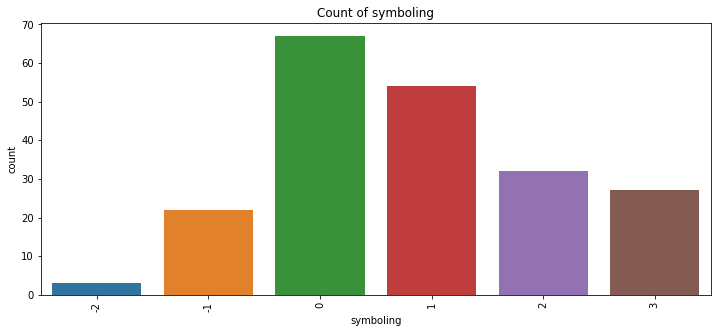

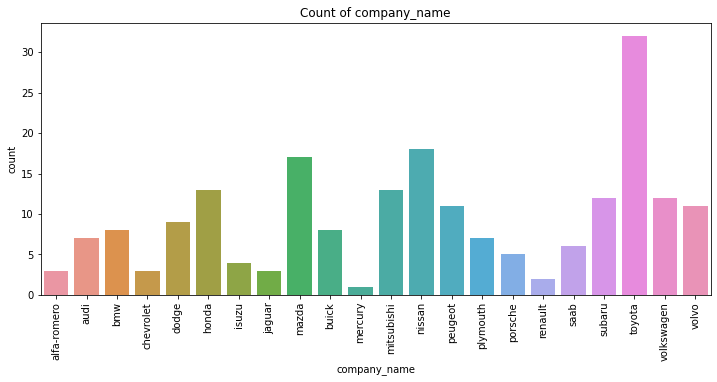

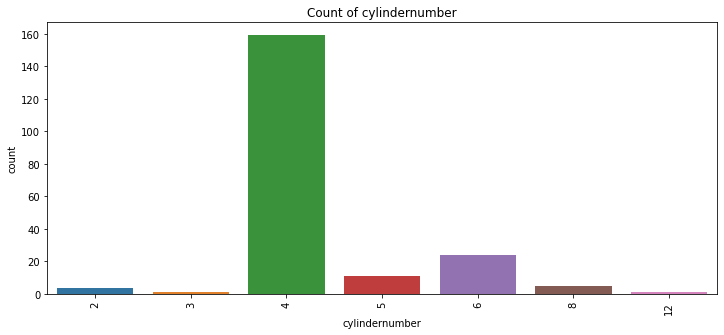

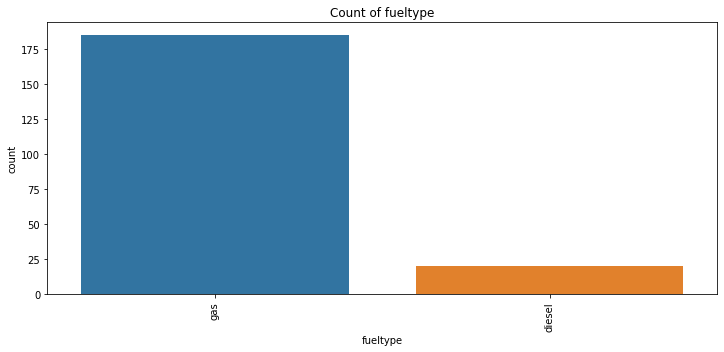

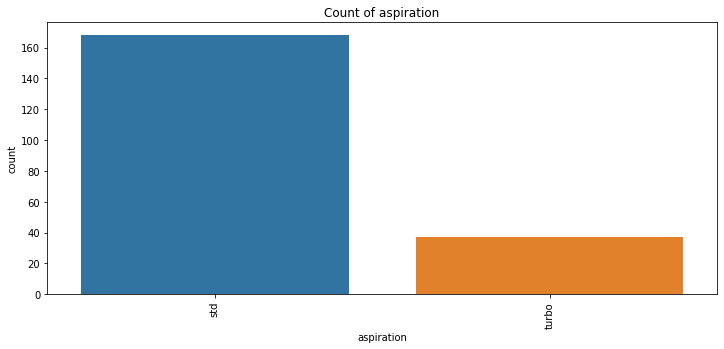

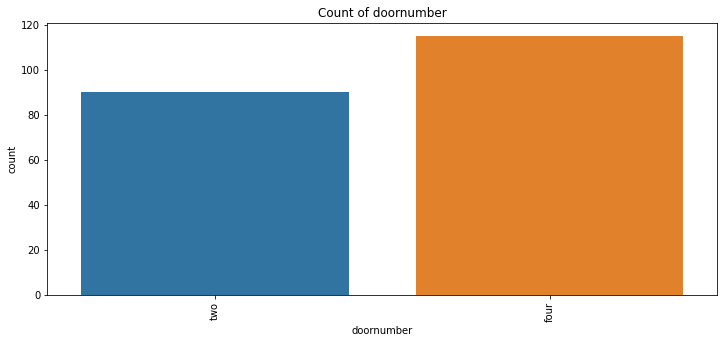

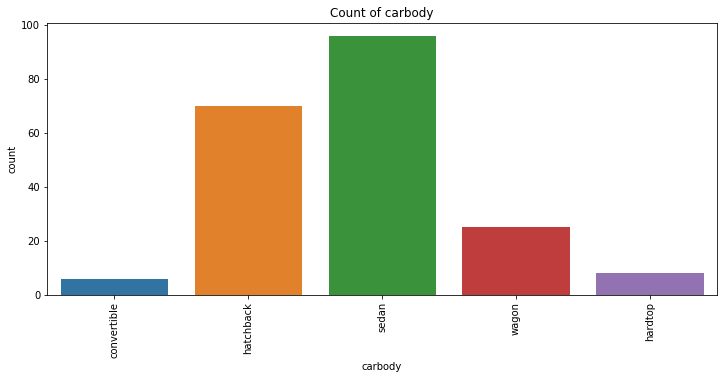

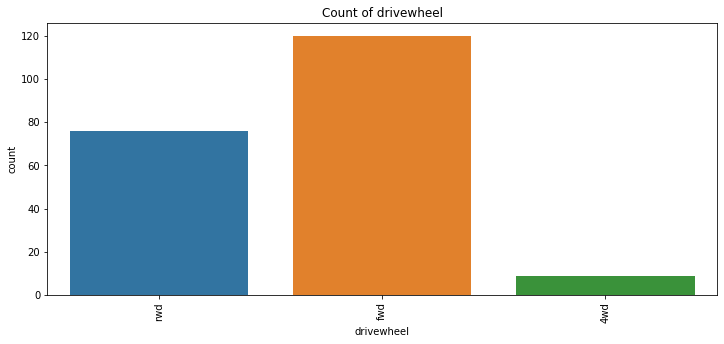

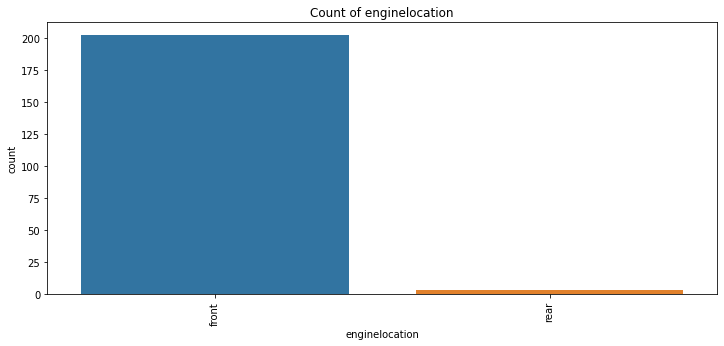

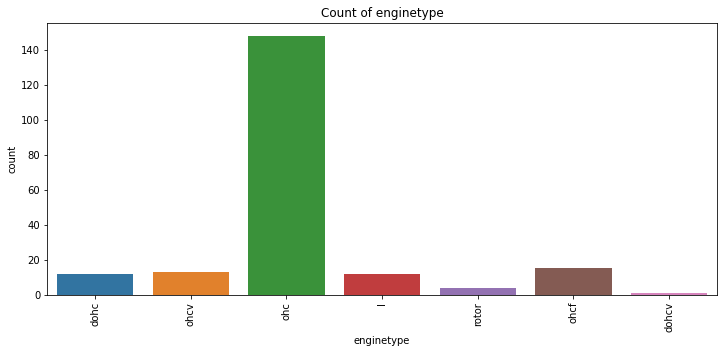

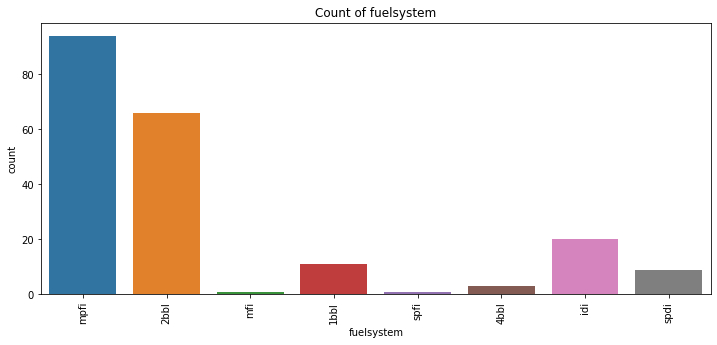

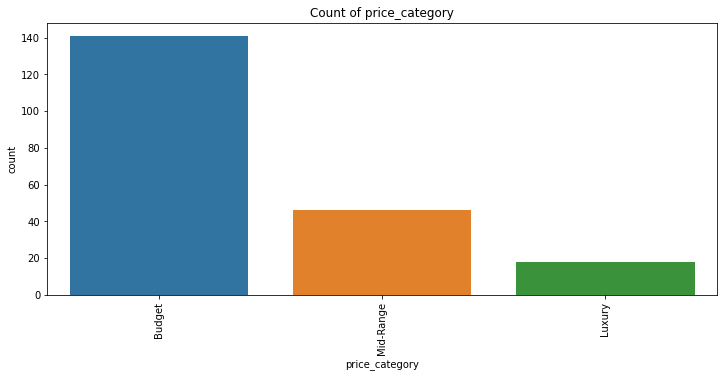

In [28]:
# Looping through categorical features for univariate analysis
for feature in categorical_features:
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    plt.show()
# Summary statistics for categorical features
categorical_summary_stats = df[categorical_features].describe()
#Kindly scroll to view the graphs

Interpretations:-

fueltype:

The countplot for fueltype shows the distribution of cars based on their fuel type, which can be either "gas" or "diesel."
It reveals that a significant majority of cars in the dataset use "gas" as their fuel type, while a smaller number of cars use "diesel."This information is essential for understanding the prevalence of different fuel types in the dataset.

aspiration:

The countplot for aspiration displays the distribution of cars based on their aspiration type, which can be "std" (standard) or "turbo" (turbocharged).It indicates that the majority of cars have a standard aspiration, while a smaller proportion are turbocharged.This information helps identify the prevalence of turbocharged cars in the dataset.

doornumber:

The countplot for doornumber represents the number of doors in cars, with options for "two" and "four" doors.
It reveals that a considerable number of cars in the dataset have four doors, while a smaller portion have two doors.
This provides insights into the distribution of cars based on the number of doors.

carbody:

The countplot for carbody illustrates the distribution of cars based on their body style, such as "sedan," "hatchback," "wagon," "hardtop," or "convertible."It shows that the "sedan" body style is the most common, followed by "hatchback," with the other styles being less frequent.This information gives an overview of the variety of car body styles in the dataset.

drivewheel:

The countplot for drivewheel shows the distribution of cars based on their drive wheel type, including "fwd" (front-wheel drive), "rwd" (rear-wheel drive), and "4wd" (four-wheel drive).
It indicates that "fwd" is the most common drive wheel type, followed by "rwd," while "4wd" is the least common.
This insight helps understand the distribution of different drive wheel types among the cars.

enginelocation:

The countplot for enginelocation reveals the distribution of cars based on the location of the engine, which can be either "front" or "rear."
It shows that the vast majority of cars have their engines located in the front, while very few have rear engine placement.
This information provides an understanding of the prevalence of rear-engine cars in the dataset.

cylindernumber:

The countplot for cylindernumber represents the distribution of cars based on the number of cylinders in their engines, with options like "four," "six," "five," "eight," "three," and "twelve."
It indicates that cars with "four" cylinders are the most common, followed by "six," while cars with "three" and "twelve" cylinders are rare.
This insight shows the distribution of different cylinder configurations.

fuelsystem:

The countplot for fuelsystem displays the distribution of cars based on their fuel system type, such as "mpfi," "2bbl," "idi," "1bbl," and others.It shows that "mpfi"(multi-point fuel injection) is the most prevalent fuel system, followed by "2bbl" and "idi," while others are less common.This information offers insights into the diversity of fuel systems used in the dataset. 

symboling:

The countplot for symboling displays the distribution of cars based on their risk symbol rating.
It shows that cars with a symbol rating of 0 are the most common in the dataset, followed by those with a rating of -1 and 1.
This information provides insights into how cars are rated for risk in the dataset, with 0 indicating a neutral rating.

company_name:

The countplot for company_name illustrates the distribution of cars based on the manufacturers or companies that produce them.
It reveals the frequency of cars from different manufacturers, helping to identify which companies are most represented in the dataset.
This information can be valuable for understanding the market share of various car manufacturers.

enginetype:

The countplot for enginetype shows the distribution of cars based on the type of engine they have, including options like "ohc," "ohcf," "ohcv," and others.
It indicates that cars with "ohc" (Overhead Camshaft) engines are the most common, followed by "ohcf" and "ohcv," while other engine types are less prevalent.
This insight helps understand the diversity of engine types used in the dataset.

price_category:

The countplot for price_category represents the distribution of cars based on their price categories, which can be "Low," "Medium," or "High."
It shows the frequency of cars falling into each price category, allowing for an understanding of the distribution of car prices in the dataset.
This information can be useful for segmenting cars based on their price ranges.

In [29]:
# Printing summary statistics
print(summary_stats)
print(categorical_summary_stats)

        wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  \
count  205.000000  205.000000  205.000000        205.000000   
mean   126.907317    3.329756    3.255415         10.142537   
std     41.642693    0.270844    0.313597          3.972040   
min     61.000000    2.540000    2.070000          7.000000   
25%     97.000000    3.150000    3.110000          8.6

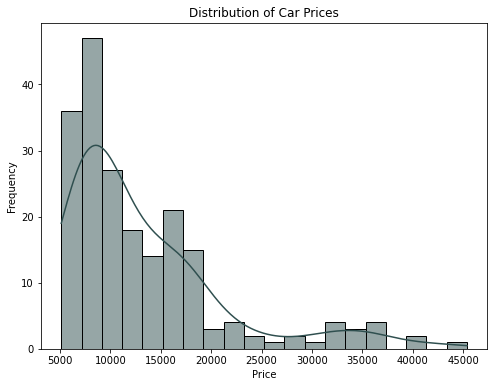

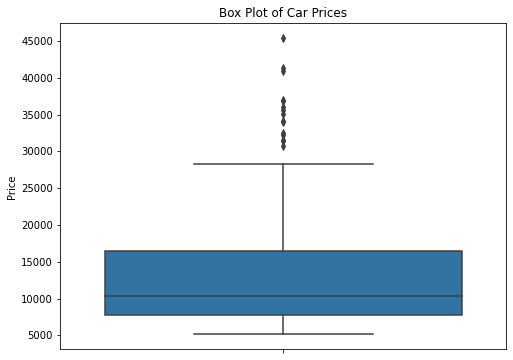

In [30]:
#Vizualizing the target feature seperately
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], color = "DarkSlateGrey", ec="black", bins=20, kde=True)  
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Adding a box plot to the analysis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show() 

Interpretations:-

Histogram :-

The histogram is right-skewed, indicating that a majority of cars have lower prices, with fewer cars having significantly higher prices.
The peak in the histogram suggests a concentration of cars in a specific price range, which might correspond to more common car models or market preferences.
This distribution provides insights into the price range most commonly represented in the dataset.

Boxplot:-

The boxplot reveals the presence of outliers in the dataset, represented as individual points beyond the whiskers. These outliers are cars with exceptionally high prices compared to the majority.
The distribution is positively skewed, indicating that there are a few cars with significantly higher prices that contribute to the skewness.

In [31]:
#df.dtypes

# Bivariate Analysis

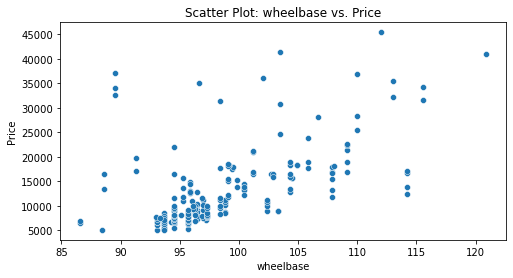

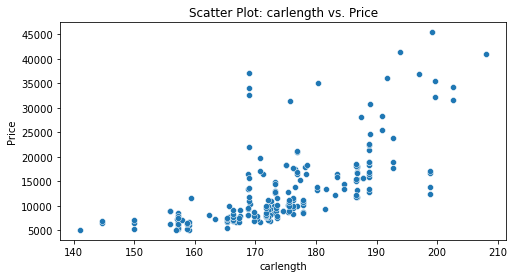

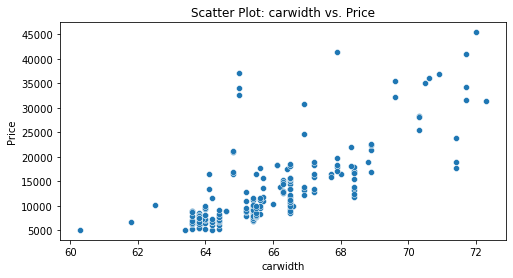

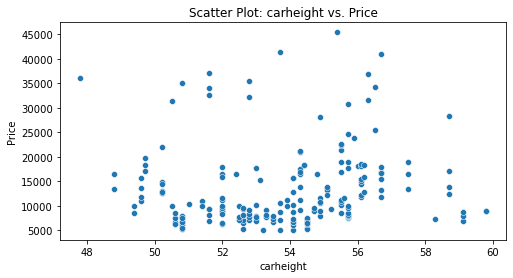

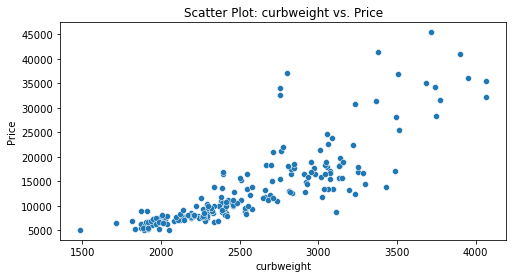

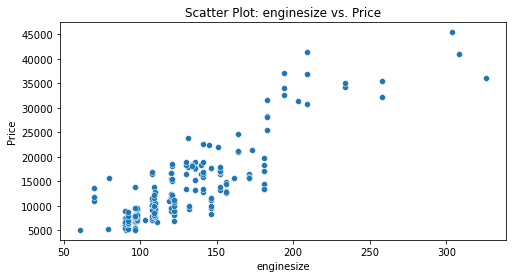

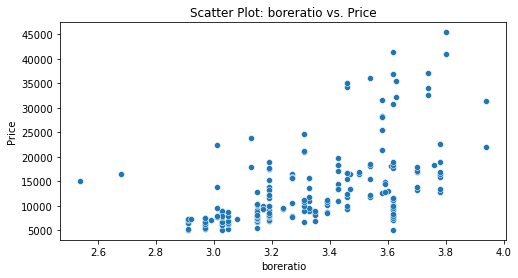

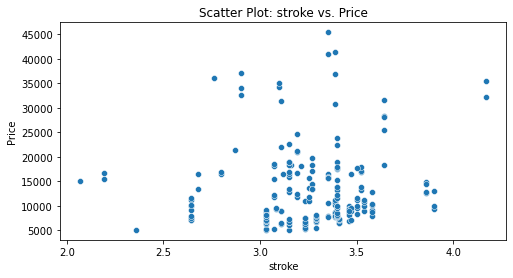

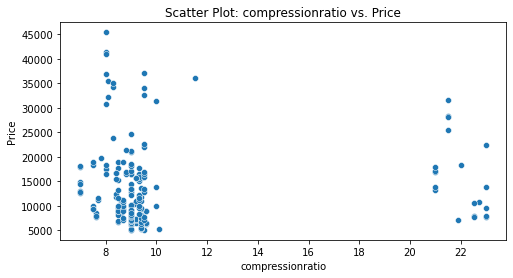

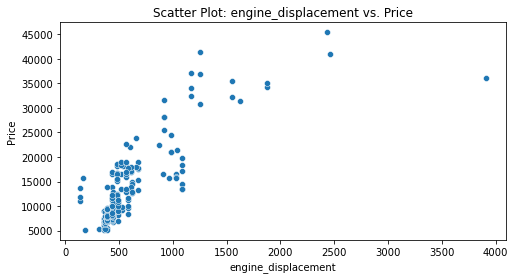

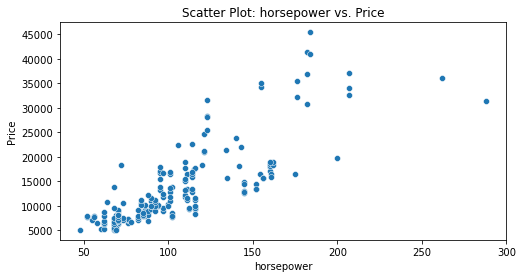

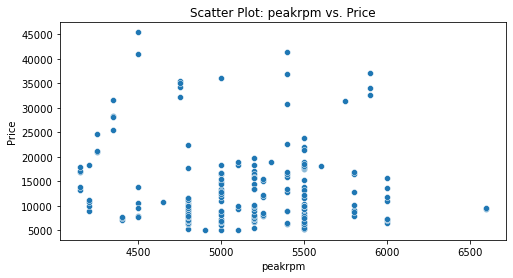

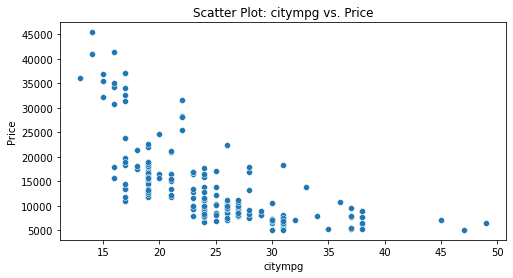

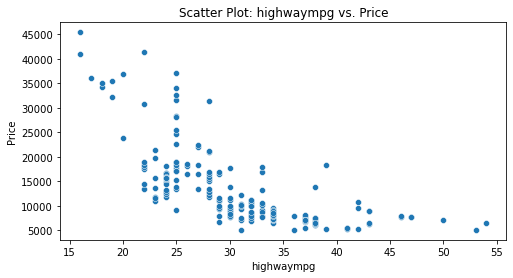

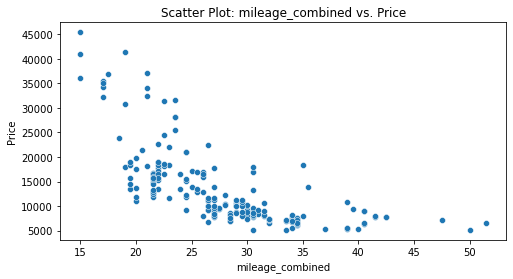

In [32]:


# List of numerical features
numeric_feat = ['wheelbase',  'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'engine_displacement', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'mileage_combined']

# Looping through numerical features for bivariate analysis
for feature in numeric_feat:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Scatter Plot: {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()
#kindly scroll to visualize all the graphs

Interpretations:-

Wheelbase vs. Price:

There appears to be a positive correlation between wheelbase (i.e., the distance between the front and rear axles) and car prices.
As the wheelbase increases, car prices tend to rise.
Longer wheelbases may be associated with larger, more expensive vehicles,like limousines.

Car Length vs. Price:

Car length shows a positive correlation with car prices.
Longer cars tend to have higher prices.


Car Width vs. Price:

Car width exhibits a positive correlation with car prices.
Wider cars are generally associated with higher prices.

Car Height vs. Price:

Car height does not appear to have a strong linear correlation with car prices
 ,indicating that height alone may not influence prices significantly.

Curb Weight vs. Price:

There is a positive correlation between curb weight and car prices.
Heavier cars are typically more expensive.


Enginesize vs. Price:

As enginesize increases, car prices tend to rise.
This suggests that cars with larger engines are generally more expensive.

Boreratio vs. Price:

Boreratio might not show a strong linear relationship with price.
The data points appear to be scattered without a proper trend.

Stroke vs. Price:

Stroke does not show a strong linear relationship with car prices.
There's no apparent trend between stroke and price.

Compressionratio vs. Price:

Compressionratio  doesn't exhibit a strong linear correlation with car prices.
Prices vary across different compression ratios without a clear pattern.

Engine Displacement vs. Price:

Engine displacement positively influences car prices.
Cars with larger engine displacements tend to have higher prices.

Horsepower vs. Price:

There is a positive correlation between horsepower and car prices.
Cars with higher horsepower values are generally more expensive.

Peak RPM vs. Price:

Peak RPM doesn't show a strong correlation with car prices.
Prices are distributed across different peak RPM values.

Citympg vs. Price:

There is a negative correlation between city MPG (miles per gallon in the city) and car prices.
Cars with higher city MPG tend to be more affordable.

Highwaympg vs. Price:

Similar to city MPG, there's a negative correlation between highway MPG (miles per gallon on the highway) and car prices.
More fuel-efficient cars have lower prices.

mileage_Combined vs. Price:

Combined mileage (average mileage) has a negative correlation with car prices.
Cars with better combined mileage are typically more budget-friendly.

In [33]:
# Converting the "cylindernumber" and "symboling" column to object type
df['cylindernumber'] = df['cylindernumber'].astype(object)
df['symboling'] = df['symboling'].astype(object)
df['car_ID'] = df['car_ID'].astype(object)
df.dtypes

car_ID                  object
symboling               object
company_name            object
model_name              object
fueltype                object
aspiration              object
doornumber              object
carbody                 object
drivewheel              object
enginelocation          object
wheelbase              float64
carlength              float64
carwidth               float64
carheight              float64
curbweight               int64
enginetype              object
cylindernumber          object
enginesize               int64
fuelsystem              object
boreratio              float64
stroke                 float64
compressionratio       float64
engine_displacement      int64
horsepower               int64
peakrpm                  int64
citympg                  int64
highwaympg               int64
mileage_combined       float64
price                  float64
price_category          object
dtype: object

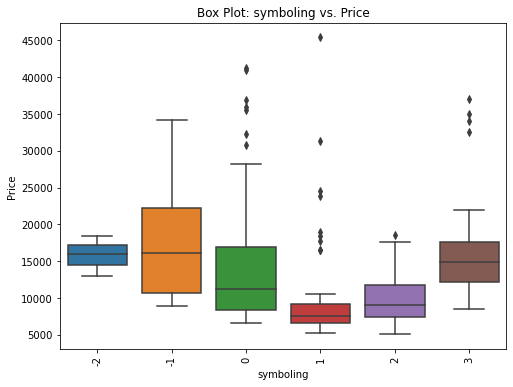

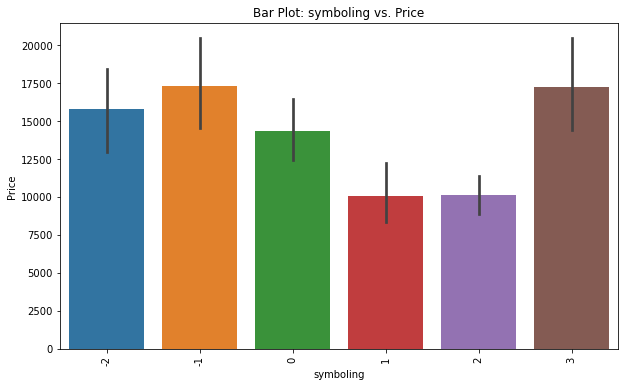

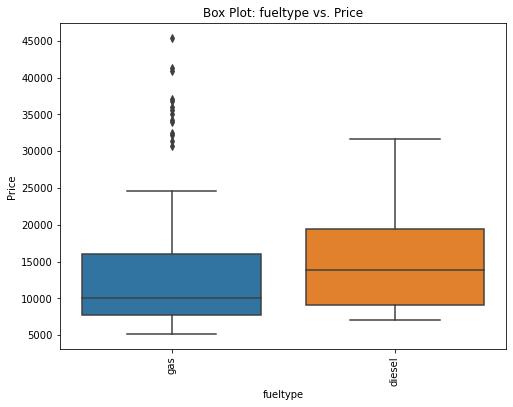

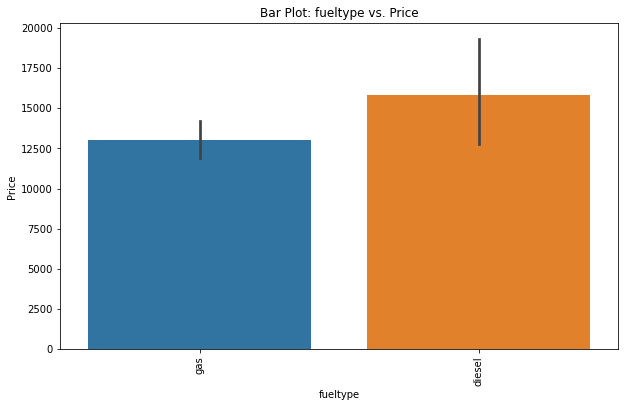

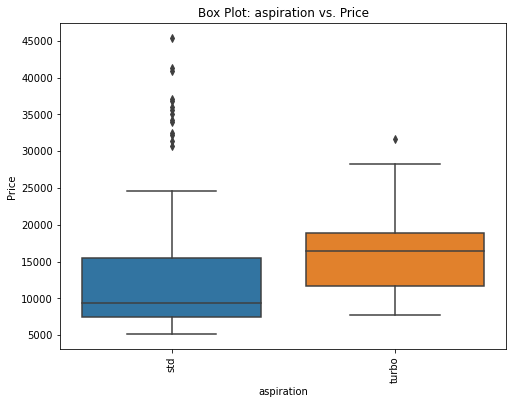

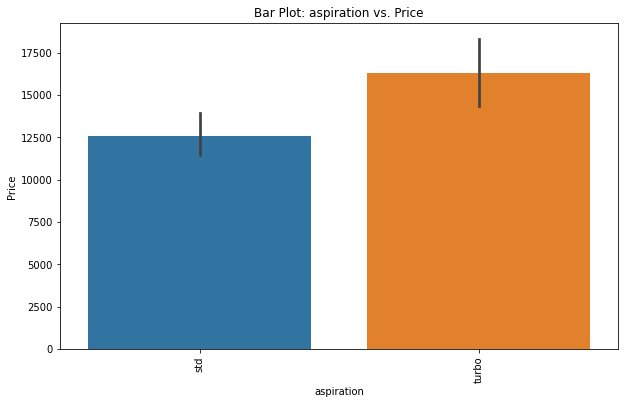

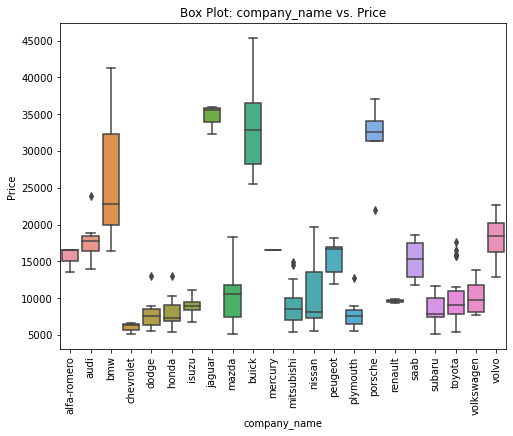

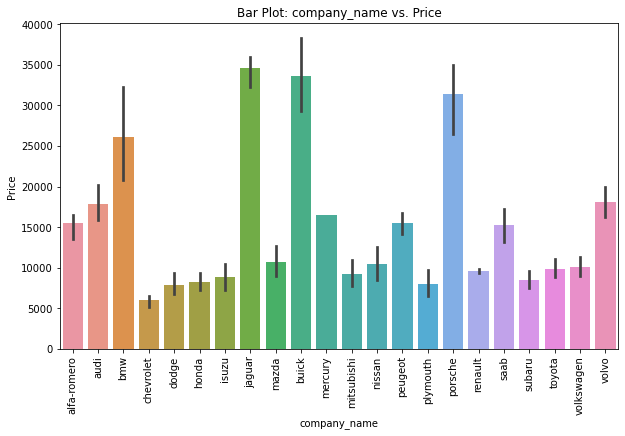

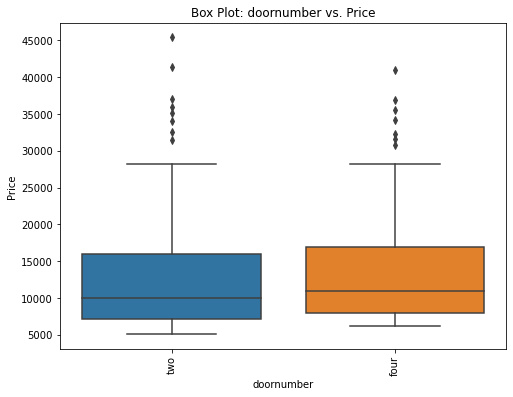

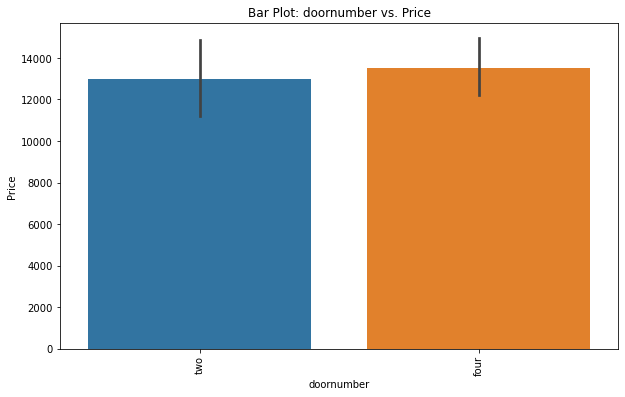

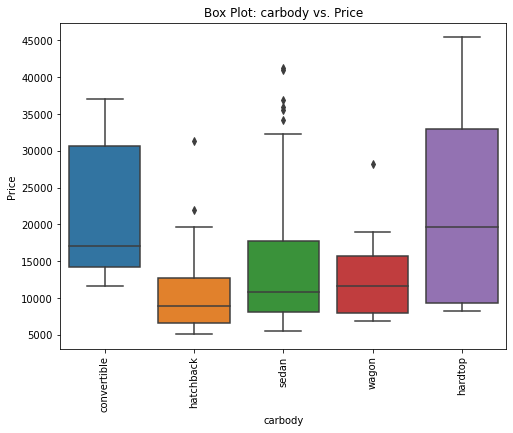

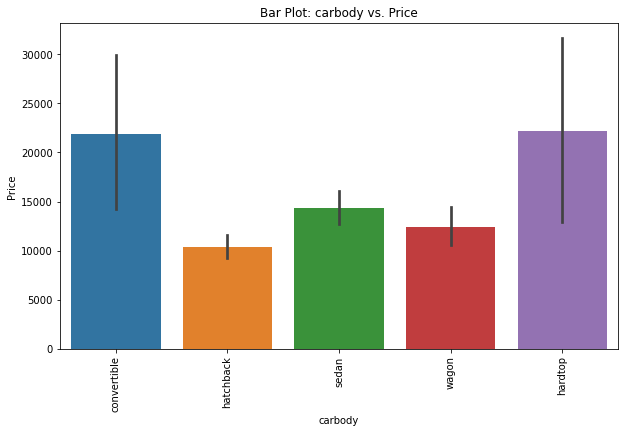

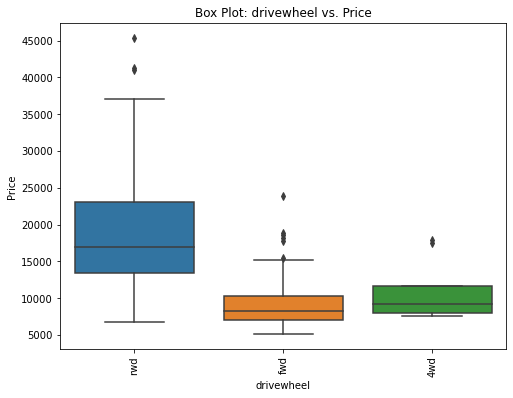

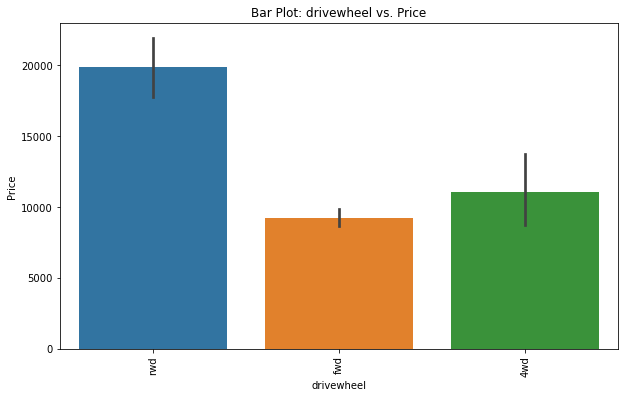

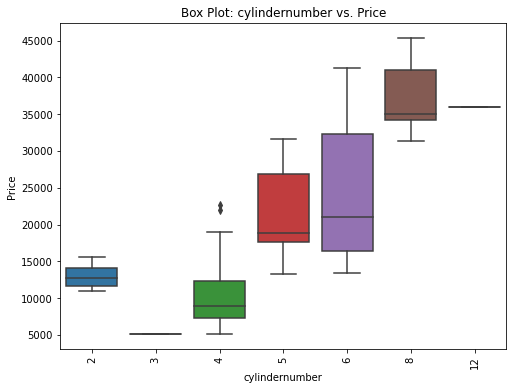

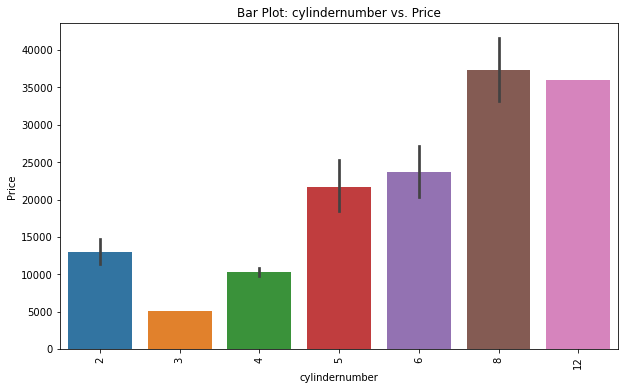

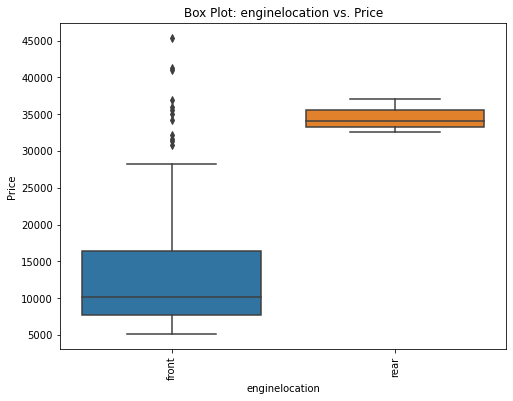

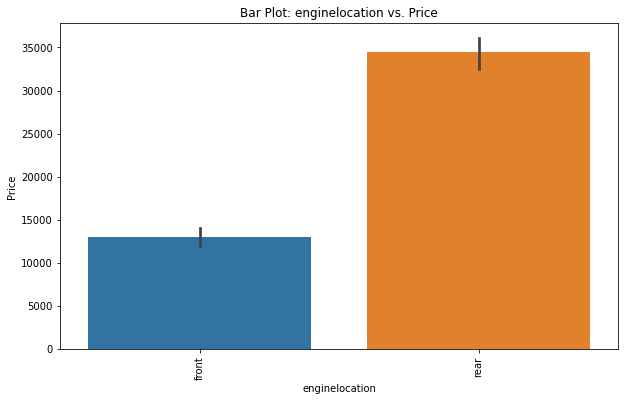

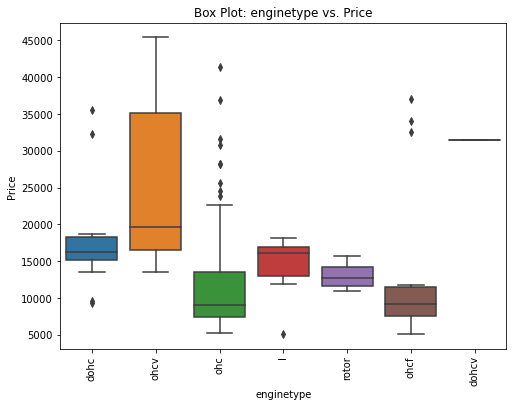

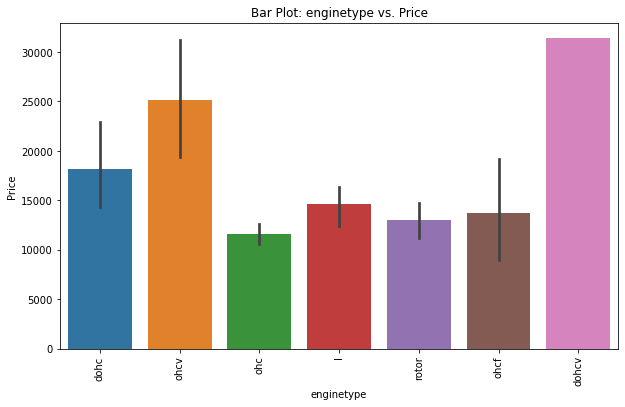

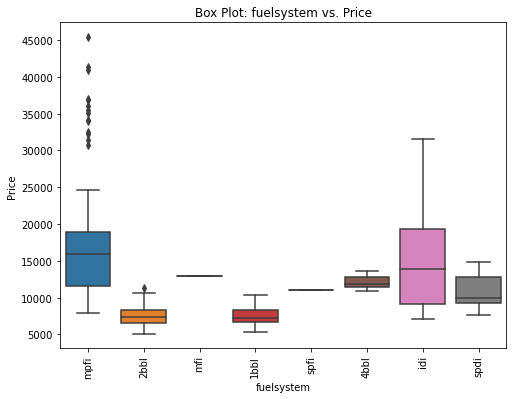

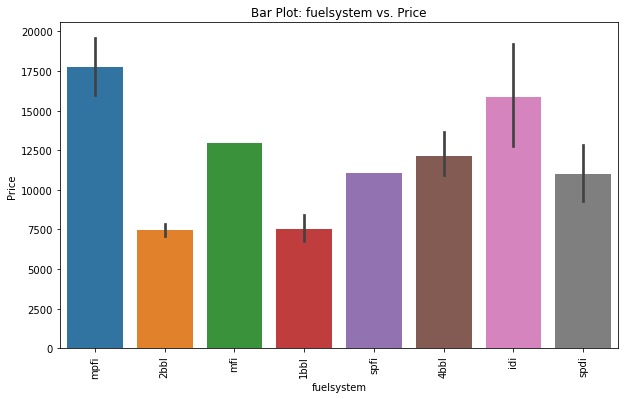

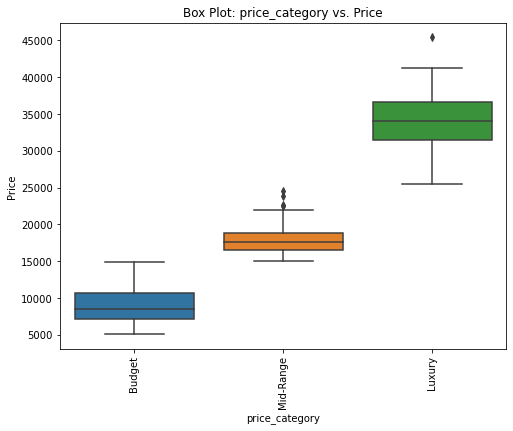

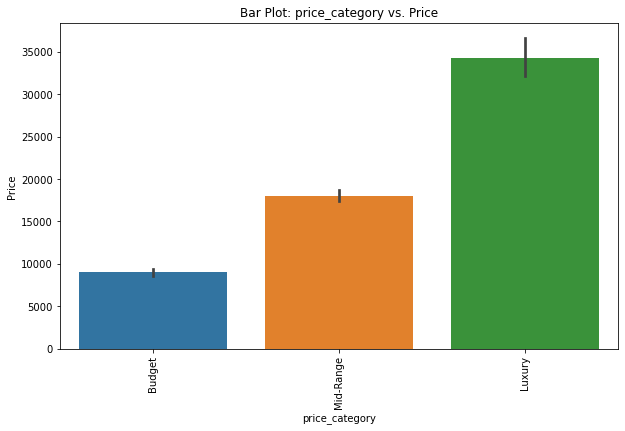

In [34]:
# List of categorical features 
categorical_feat = ['symboling','fueltype', 'aspiration','company_name', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber','enginelocation', 'enginetype', 'fuelsystem', 'price_category']

# Looping through categorical features for bivariate analysis
for feature in categorical_feat:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Box Plot: {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='price', data=df)
    plt.title(f'Bar Plot: {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()
#kindly scroll to visualize all the graphs

Interpretations:-

Symboling:-
 
We can clearly observe cars having symboling 0,1 and 3 have most number of outliers.We can observe that cars with symboling -1 are most expensive, followed by 0,and then followed by 3 .

fueltype:-

It is clear that cars using diesel are more costly than the cars using gas as fuel,but cars using gas do have some outliers which suggest signifcantly higher prices, so it maybe due to different manufacturer.

aspiration:-

As we can see that,cars having Turbo Aspiration have higher price range than the STD Aspiration.
Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

company_name:-

As it is evident from the graphs,jaguar has most expensive cars followed by buick and porsche,while chevrolet having the cheapest cars,suggesting which companies provide budget cars and which company provide luxury cars.

doornumber:-

As we can observe,Cars with four doors are slightly more expensive when we compare the average price of cars having two doors or four doors.
Outliers prsesent in two door cars states that some of the cars are are more expensive than the cars with four doors

carbody:-

As we can see that cars having hardtop body-type are the most expensive cars followed by convertible,while sedan being third in terms of cost.

drivewheel:-

As we observe,cars with RWD (Rear Wheel Drive) are most expensive while cars having FWD(Front Wheel Drive) are the cheapest.
So it can be concluded that premium cars use rwd while budget cars use fwd.

cylindernumber-

As we see that cars with 12 cylinders are the costliest followed by 8 and then 6 cylinders.

enginelocation:-

It is evident that cars with engine location at the rear are far more expensive than the cars with engine in front,but interestingly some cars with engine in front far outclasses these cars with engine in rear position in terms of price.

enginetype:-

We see that cars with dohcv engine type are most expensive followed by ohcv,while ohc engine type cars are cheapest.But as outliers suggest some cars with ohc engine type far outclasses most of the cars with other engine types in terms of price.

fuelsystem:-

Cars having mpfi fuel system are the most expensive cars followed by idi fuel system cars which suggest luxury car brands would prefer to use a mpfi fuel system.

price_category:-

As the graph suggests,
luxury cars are most expensive followed by mid range and budget friendly cars being cheapest.

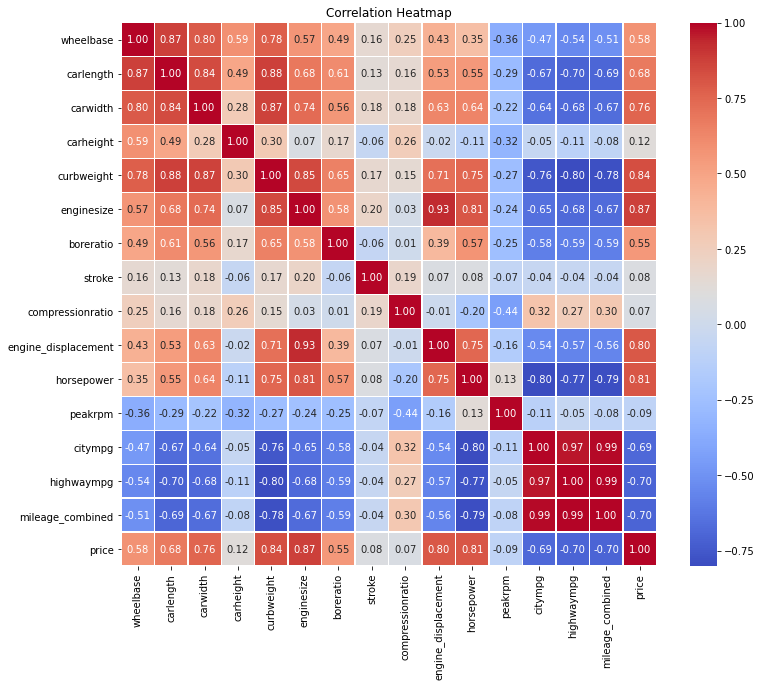

In [35]:
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:

import statsmodels.api as sm


#Identifying Highly Correlated Features
corr_matrix = df.corr()
highly_correlated_pairs = np.where(np.abs(corr_matrix) > 0.8)  # Adjust the threshold as needed

# Creating a list of correlated feature pairs to drop
correlated_features_to_drop = set()
for i, j in zip(*highly_correlated_pairs):
    if i != j and i < j:
        correlated_features_to_drop.add(df.columns[i])

# Dropping Highly Correlated Features
df_cleaned = df.drop(columns=correlated_features_to_drop)




In [37]:


def outlierstreatment(df, threshold=0.05):


    # Creating a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Looping through numeric columns
    for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
        # Calculating lower and upper bounds 
        lower_bound = df_cleaned[col].quantile(threshold)
        upper_bound = df_cleaned[col].quantile(1 - threshold)
        
        #treating outliers
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

    return df_cleaned

#Creating dummy variables for categorical columns
numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])
categorical = df_cleaned.select_dtypes(include=['object'])
categorical = pd.get_dummies(categorical)
#merging categorical and numerical columns
X = pd.concat([numeric, categorical], axis=1)
y = df_cleaned['price']

# Scaling the numeric features
scaler = StandardScaler()
X[numeric.columns] = scaler.fit_transform(X[numeric.columns])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [38]:
#Using linear regression 
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the Train and Test Set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluation of the Model on Training data and Test data by Calculating R2 score
r2_train = r2_score(y_train, y_train_pred)
print("R-squared score (Training Data):", r2_train)
r2_test = r2_score(y_test, y_pred)
print("R-squared score (Test Data):", r2_test)

R-squared score (Training Data): 1.0
R-squared score (Test Data): 0.999999534904854


As we can see that our model gave us a 99% accuracy using linear regression model,which is a good score and can be used for prediction of car prices in future.Although 99% of the variation in the target variable is explained by the independent variables in our model,it is still prone to overfitting which must be taken into consideration.

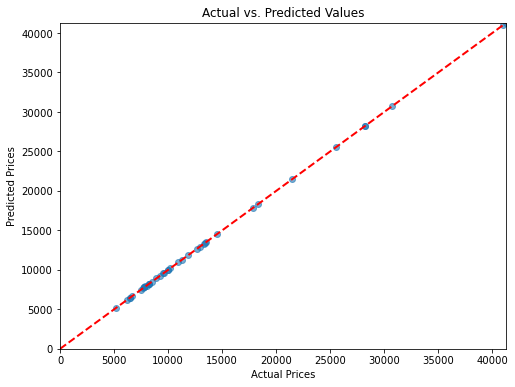

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(0, max(y_test))
plt.ylim(0, max(y_test))
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

In [40]:
# Fitting the linear regression model using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Printing the summary of the linear regression model
print("Linear Regression Summary:")
print(model.summary())

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.458e+27
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.63e-191
Time:                        18:49:03   Log-Likelihood:                 3692.8
No. Observations:                 164   AIC:                            -7086.
Df Residuals:                      14   BIC:                            -6621.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------